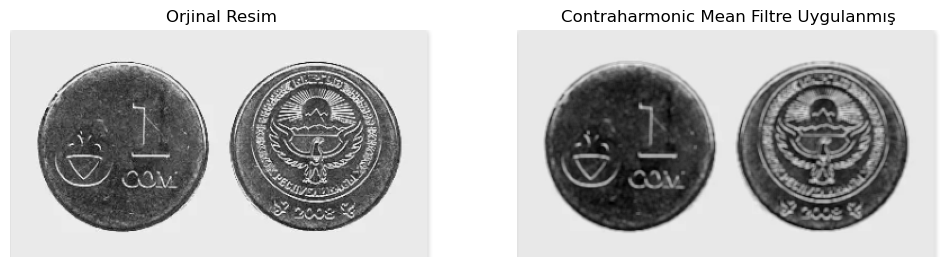

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contraharmonic_mean_filter(image, kernel_size, Q):
    padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_REPLICATE)
    result_image = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            numerator = np.sum(np.power(region, Q + 1))
            denominator = np.sum(np.power(region, Q))
            
            # Avoid division by zero
            if denominator != 0:
                result_image[i, j] = numerator / denominator

    return result_image.astype(np.uint8)

# Resmi oku
img = cv2.imread('bit.png', 0)  # 0, gri tonlamalı okuma

# Contraharmonic Mean filtresi uygula
kernel_size = 3  # Filtre boyutunu belirle (örneğin, 3x3)
Q = 1.5  # Q parametresini belirle

filtered_img = contraharmonic_mean_filter(img, kernel_size, Q)

# Orjinal ve Contraharmonic Mean uygulanmış resmi görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Orjinal Resim')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contraharmonic Mean Filtre Uygulanmış')
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.show()
